#### Table of content
- <a href="#histogram">Histogram</a>
- <a href="#density_plot">Density plot</a>
- <a href="#stacked_histogram">Stacked histogram</a>
- <a href="#stacked_density_plot">Stacked density plot</a>
- <a href="#overlapping_histograms">Overlapping histograms</a>
- <a href="#overlapping_density_plots">Overlapping density plots</a>
- <a href="#ridge_chart">Ridge chart</a>
- <a href="#population_pyramid">Population pyramid</a>
- <a href="#qqplot">Quantile-Quantile plot (Q-Q plot)</a>
- <a href="#logarith">Graphs with high skewness and logarithmic scales</a>
- <a href="#box_plot">Box plots</a>
- <a href="#violin_plot">Violin plot</a>
- <a href="#strip_plot">Strip plot</a>

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data

Source <a href="https://www.kaggle.com/datasets/brendan45774/test-file">here</a>.

In [2]:
data = pd.read_csv("data/titanic.csv")
# converting Pclass column to more readable form
data['Pclass'] = data['Pclass'].transform(lambda pc: 'First' if pc == 1 else ('Second' if pc == 2 else 'Third'))
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,Third,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,Third,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,Second,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


<h1 id="histogram">Histogram</h1>

##### **Graph explanation**
Most common graph type for data distribution. On the x-axis we have the range that a specific parameter reaches, and on the y-axis we have the number of samples belonging to a specific range.

##### **Code explanation**
`plt.figure(figsize=(10, 5))`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;**figsize** is graph size in inches.

`plt.hist(data.Age, bins=32, color='#c41414')`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;This is a function that create the histogram. First argument is numeric data and bins is number of bars building the histogram.

`plt.title('Age distribution')`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Title of graph.

`plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;This functions set the current tick locations and labels of the x-axis. First argument is tick locations and a second argument is label for all set ticks.

`plt.xlim(-3, 83)`<br/>
&nbsp;&nbsp;&nbsp;&nbsp; Limits of the current x-axes.

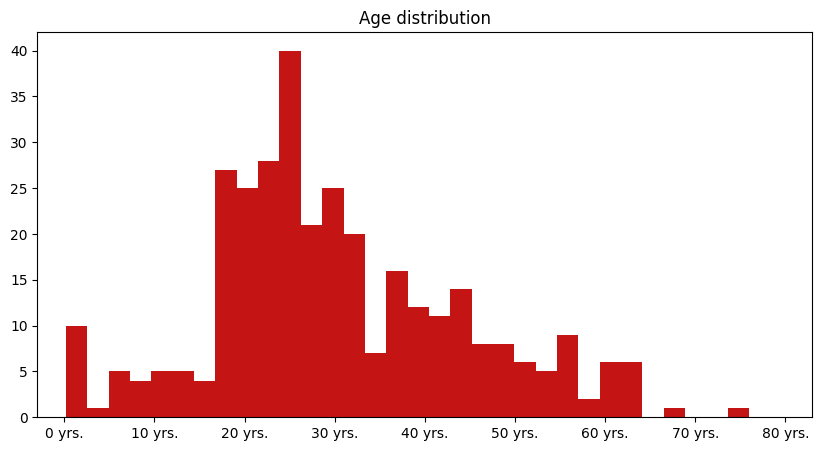

In [88]:
plt.figure(figsize=(10, 5))
plt.hist(data.Age, bins=32, color='#c41414')
plt.title('Age distribution')
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.show()

<h1 id="density_plot">Density plot</h1>

##### **Graph explanation**
Density plot or KDE (kernel density estimation) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. As a result we get smoother histogram shows data distribution, but the biggest disadvantage is that the chart are not precise and not presentable observations data one-to-one. More informations: <a href="https://www.youtube.com/watch?v=x5zLaWT5KPs">Intro to Kernel Density Estimation Youtube</a>, <a href="https://en.wikipedia.org/wiki/Kernel_density_estimation">Kernel density estimation Wikipedia</a>

##### **Code explanation**
`sns.kdeplot(data, x='Age', bw_adjust=1, color='red', fill=True, cut=0)`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Function for creating a KDE plot. First arguments is a dataset and next we specify a few arguments:
- **x** - Column from data dataset with numeric data.
- **bw_adjust** - A paremeter that determines how smooth the curve is. Larger values = smoother curve.
- **fill** - Whether the chart is filled with color.
- **cut** - This determines how far the evaluation grid extends past the extreme datapoints.

`plt.xlabel('')`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;**xlabel** function set the graph x-axis title. In this case we delete title by setting it to empty string.

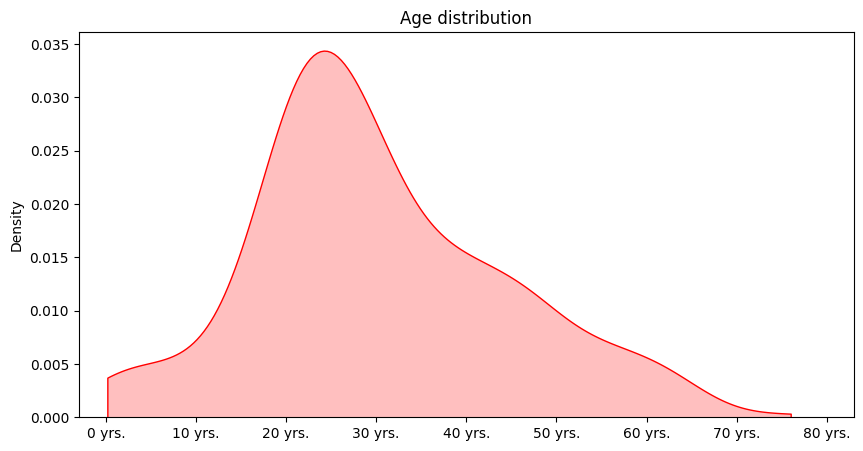

In [6]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data, x='Age', bw_adjust=1, color='red', fill=True, cut=0)
plt.title("Age distribution")
plt.xlabel('')
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.show()

<h1 id="stacked_histogram">Stacked histogram</h1>

##### **Graph explanation**
Normal histograms but the values of the two histograms are superimposed on each other.

##### **Code explanation**
`notSurvived = data[data['Survived'] == 0]['Age']`<br/>
`survived = data[data['Survived'] == 1]['Age']`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;This segment creates two dataframes with passengers who survived and those who did not survive.

`plt.hist([notSurvived, survived], bins = 16, stacked = True, color=['#714da1', '#b57dff'])`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Similar to a case with single histogram first arguments is list n (in this case 2) datasets with numeric observations. To stacked all these histograms we set **stacked** argument to **True**.

`plt.legend(["Not survived", "Survived"])`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;A legend displayed in one of the corners with an explanation of which color means what.

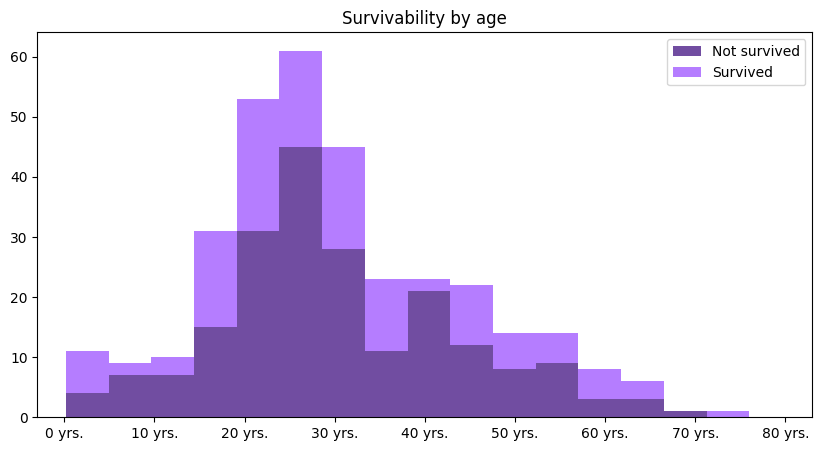

In [91]:
notSurvived = data[data['Survived'] == 0]['Age']
survived = data[data['Survived'] == 1]['Age']

plt.figure(figsize=(10, 5))
plt.hist([notSurvived, survived], bins = 16, stacked = True, color=['#714da1', '#b57dff'])
plt.title("Survivability by age")
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.legend(["Not survived", "Survived"])
plt.show()

<h1 id="stacked_density_plot">Stacked density plot</h1>

##### **Graph explanation**
Similar to stacked histograms there are density plots superimposed on each other.

##### **Code explanation**
`sns.kdeplot(data, x='Age', hue='Survived', multiple='stack', fill=True, palette='Blues', cut=0)`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;To create stacked KDE plot we have to set a few parameters:
- **hue** - To determine which feature will divide into fragments.
- **multiple** - To determine which type of division we want to use. **'stack'** give us stacked charts.
- **palette** - Also we use color palette and we set this argument to **'Blues'**, that give us charts on blue scale. More info about color scalers <a href="https://matplotlib.org/stable/users/explain/colors/colormaps.html">here</a>.

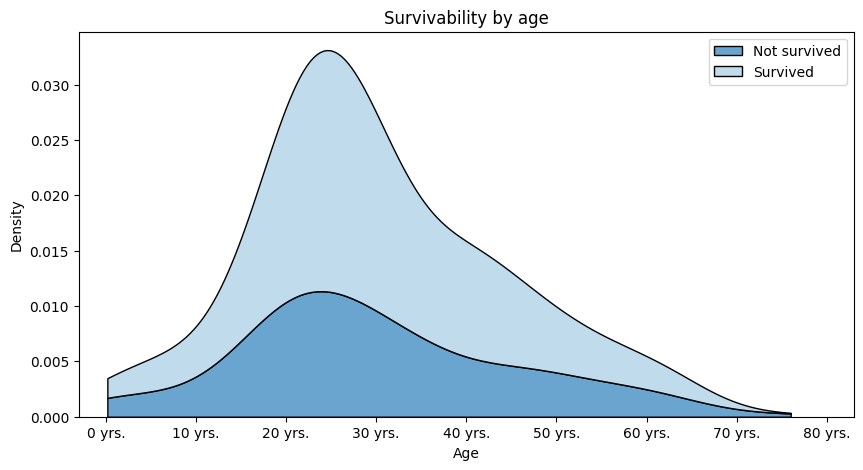

In [94]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data, x='Age', hue='Survived', multiple='stack', fill=True, palette='Blues', cut=0)
plt.title("Survivability by age")
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.legend(["Not survived", "Survived"])
plt.show()

<h1 id="overlapping_histograms">Overlapping histograms</h1>

##### **Graph explanation**
These are histograms that overlap.

##### **Code explanation**
`sns.histplot(data, x='Age', hue='Pclass', palette='hot', bins=19)`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;In this case we use seaborn library in contrast to stacked histograms where we use matplotlib. To specify which feature will divide histograms to overlaped groups we have to set hue argument. Here we set to **'Pclass'**.

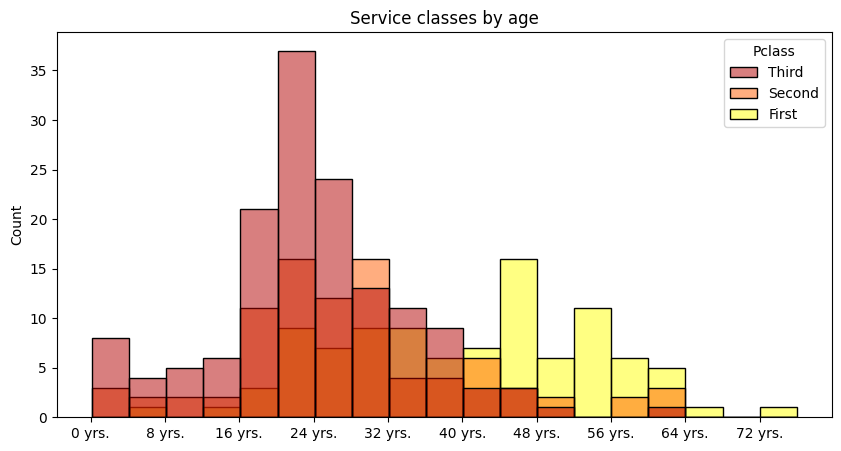

In [101]:
plt.figure(figsize=(10, 5))
sns.histplot(data, x='Age', hue='Pclass', palette='hot', bins=19)
plt.xticks(np.arange(0, 77, 8), [f"{yrs} yrs." for yrs in np.arange(0, 77, 8)])
plt.title("Service classes by age")
plt.xlabel('')
plt.show()

<h1 id="overlapping_density_plots">Overlapping density plots</h1>

##### **Graph explanation**
These are overlap KDE plots and as you can see overlapping density plots are more readable than overlapping histograms.

##### **Code explanation**
`sns.kdeplot(data, x='Age', hue='Pclass', fill=True, palette='summer', cut=0)`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Situation is the same as in stacked density plots, but we don't set multiple argument to **'stack'**.

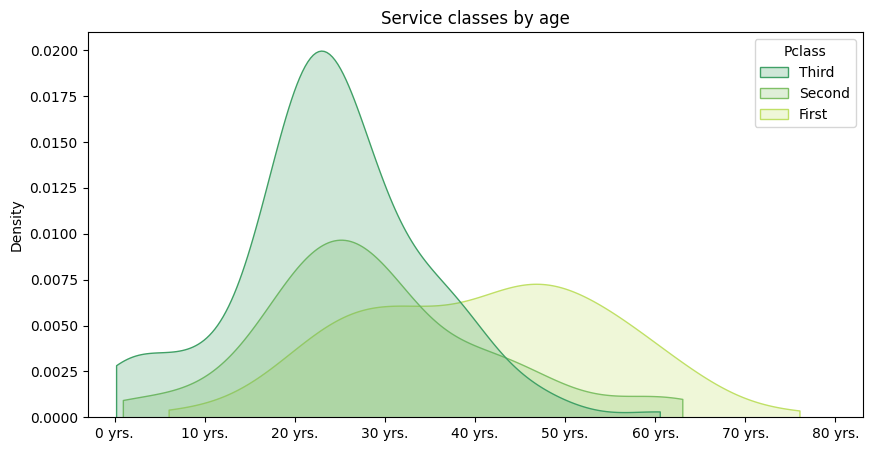

In [107]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data, x='Age', hue='Pclass', fill=True, palette='summer', cut=0)
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.title("Service classes by age")
plt.xlabel('')
plt.show()

<h1 id="ridge_chart">Ridge chart</h1>

##### **Graph explanation**
This graph is a group of density plots arranged vertically and sharing the same x-axis. There is no dedicated function in both seaborn and matplotlib for creating ridge plot, so we have to use other methods described, among others, in this <a href="https://plainenglish.io/blog/ridge-plots-with-pythons-seaborn-4de5725881af">text</a>.

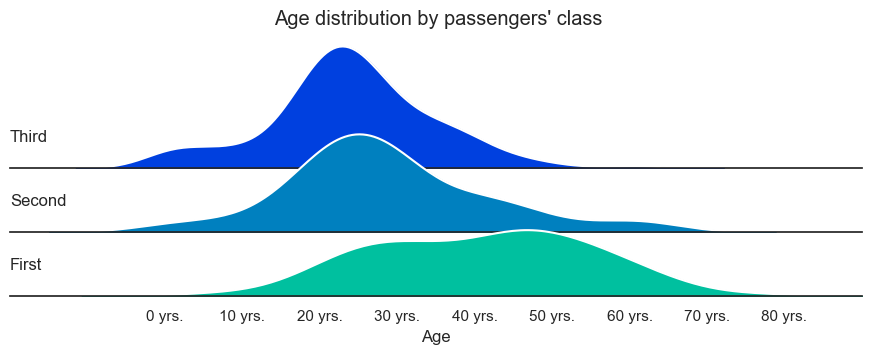

In [19]:
# At the beggining we have to set style of graph to 'white' and make background for all
# subplot transparent by setting facecolor to (0, 0, 0, 0) where the fourth value is alpha
# channel. 0 on alpha channel means it is fully transparent.
sns.set_theme(style='white', rc={"axes.facecolor": (0, 0, 0, 0)})

# Next we need to create a grid of charts. Divsion into subplots in this case is determined
# by 'Pclass', so FaceGrid create three chart for first, second and third class by setting
# row arugment to 'Pclass'. Next we need to specify which feature we use to color the chart
# by setting hue. Then we set the height of individual subplot and aspect (ratio between
# width and height).
g = sns.FacetGrid(data, row="Pclass", hue="Pclass", aspect=8, height=1.2, palette='winter')

# Then we determine what type of chart we visualize (in this case density plot). First
# function create filling for charts on all subplots and the second function create white
# border for charts to make graph more readable.
g.map_dataframe(sns.kdeplot, x="Age", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Age", color='white')

# Next we need to close up charts and make them overlap a little. hspace arguments
# determined space between subplots and we set this argument to negative value which caused
# the charts to overlap.
g.fig.subplots_adjust(hspace=-0.5)

# This function delete left border.
g.despine(left=True)

# Next we set some paremeters for all subplots.
for ax, name in zip(g.axes.flat, data.Pclass.unique()):
    ax.set_title("")
    ax.set_ylabel("")
    ax.set_yticks([])
    ax.set_xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
    ax.set_xlim(-20, 90)
    # Also we add chart title by adding text on the left side of the chart.
    ax.text(-20, 0.01, name)

plt.suptitle("Age distribution by passengers' class", x=0.54)
plt.show()

<h1 id="population_pyramid">Population pyramid</h1>

##### **Graph explanation**


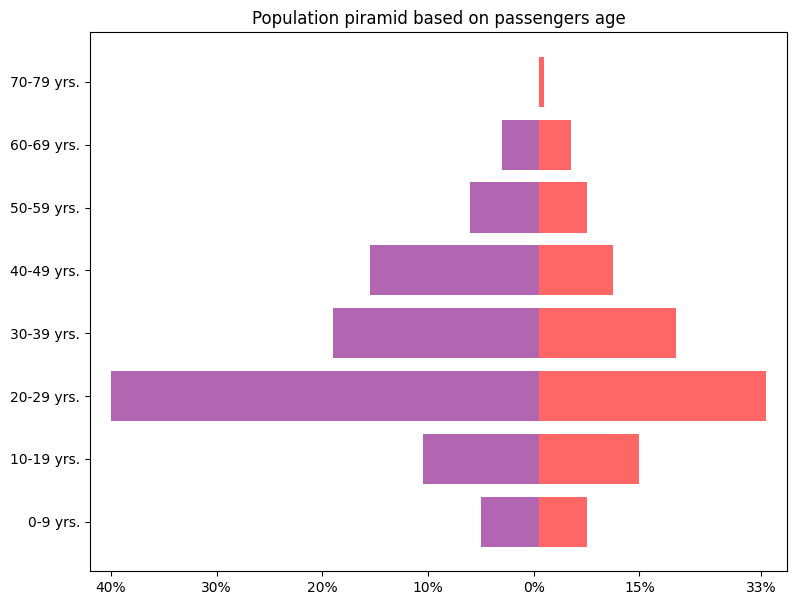

In [137]:
subset = data[data.Age.notnull()][['Age', 'Sex']]
subset.Age = subset.Age.transform(lambda age: f"{int(age//10*10)}-{int(age//10*10+9)} yrs.")
male = subset[subset.Sex == 'male'].value_counts('Age').sort_index().to_frame()
female = subset[subset.Sex == 'female'].value_counts('Age').sort_index().to_frame()

plt.figure(figsize=(9, 7))
plt.barh(y=female.index, width=female['count'], color='red', label='Female', alpha=0.6)
plt.barh(y=male.index, width=male['count'], left=-male['count'], color='purple', label='Male', alpha=0.6)

maleMax = male['count'].max()
femaleMax = female['count'].max()
maleMaxPercent = male['count'].transform(lambda x: x/male['count'].sum()).max()
femaleMaxPercentage = female['count'].transform(lambda x: x/female['count'].sum()).max()
xTicks = list(range(-maleMax, femaleMax, 20))[:-1]+[42]
def xScale(percentage):
    if percentage < 0:
        return int(abs(np.round(percentage/maleMax*maleMaxPercent*100)))
    else:
        return int(abs(np.round(percentage/femaleMax*femaleMaxPercentage*100)))
plt.xticks(xTicks, [f"{xScale(percentage)}%" for percentage in xTicks])

plt.xlim(-85, 47)
plt.title("Population piramid based on passengers age")
plt.show()

<h1 id="qqplot">Quantile-Quantile plot (Q-Q plot)</h1>

In [117]:
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler

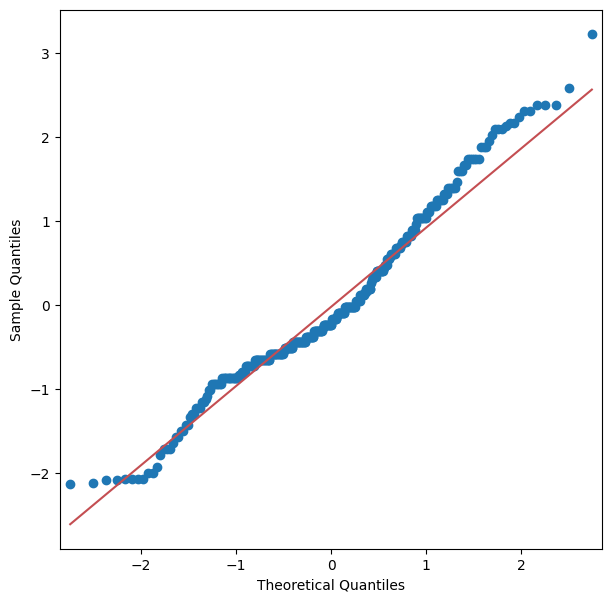

In [138]:
age = data.Age.copy().dropna().to_numpy()
age = StandardScaler().fit_transform(age.reshape((len(age), 1)))
age = age.reshape((len(age)))

fig, ax = plt.subplots(figsize=(7, 7))
sm.qqplot(age, dist=stats.norm, ax=ax, line='q')
plt.show()

<h1 id="logarith">Graphs with high skewness and logarithmic scales</h1>

<Figure size 640x480 with 0 Axes>

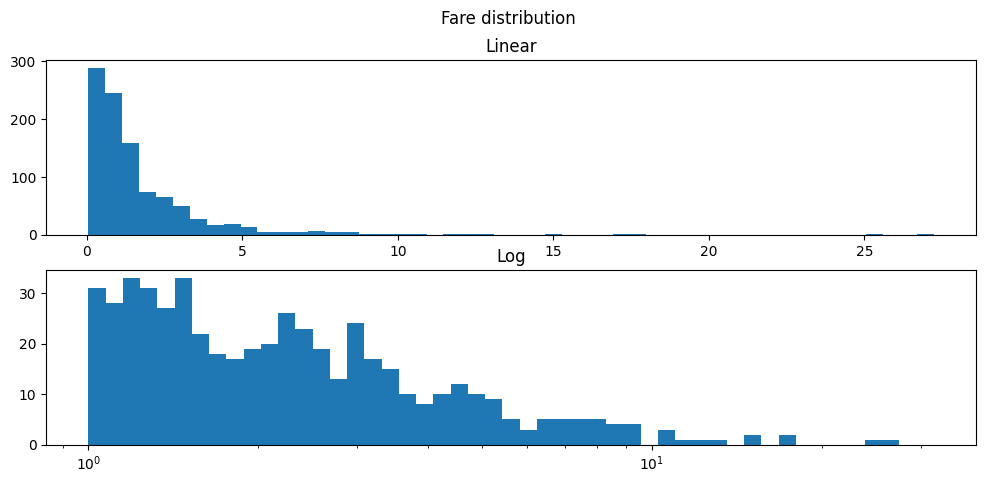

In [165]:
normal = np.random.lognormal(size=1000)
plt.tight_layout(pad=1)
fig, ax = plt.subplots(nrows=2, figsize=(12, 5))
ax[0].hist(normal, bins=50)
ax[0].set_title("Linear")
ax[1].hist(normal, bins=10**(np.linspace(0, 1.5, 50)))
ax[1].set_xscale('log')
ax[1].set_title("Log")
plt.suptitle("Fare distribution", x=0.51)
plt.show()

<h1 id="box_plot">Box plots</h1>

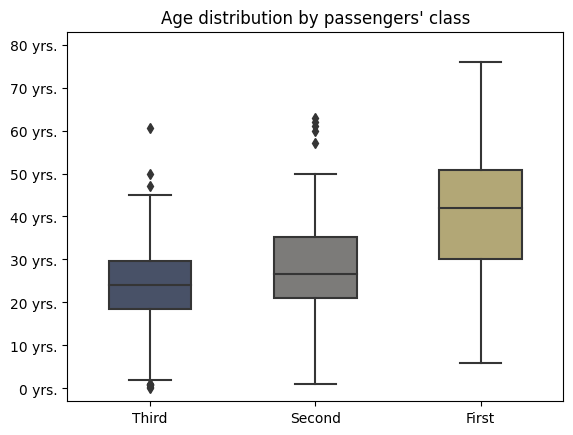

In [110]:
sns.boxplot(data, y='Age', x='Pclass', palette='cividis', width=0.5)
plt.yticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.ylim(-3, 83)
plt.title("Age distribution by passengers' class")
plt.xlabel('')
plt.ylabel('')
plt.show()

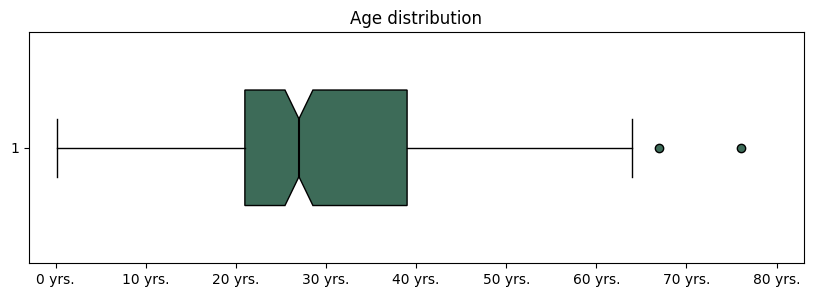

In [111]:
plt.figure(figsize=(10, 3))
plt.boxplot(
    data.Age.dropna(), vert=False, widths=0.5, notch=True,
    patch_artist = True,
    flierprops = dict(marker = "o", markerfacecolor = "#3d6b58"),
    boxprops = dict(facecolor = "#3d6b58"),
    medianprops = dict(color = "black", linewidth = 1.5)
)
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.title("Age distribution")
plt.show()

<h1 id="violin_plot">Violin plot</h1>

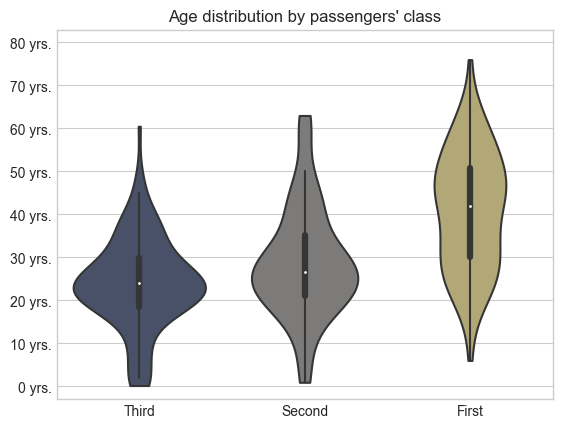

In [112]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.violinplot(
    data, x='Pclass', y='Age', palette='cividis', cut=0
)
plt.yticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.ylim(-3, 83)
plt.title("Age distribution by passengers' class")
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.style.use('default')

<h1 id="strip_plot">Strip plot</h1>

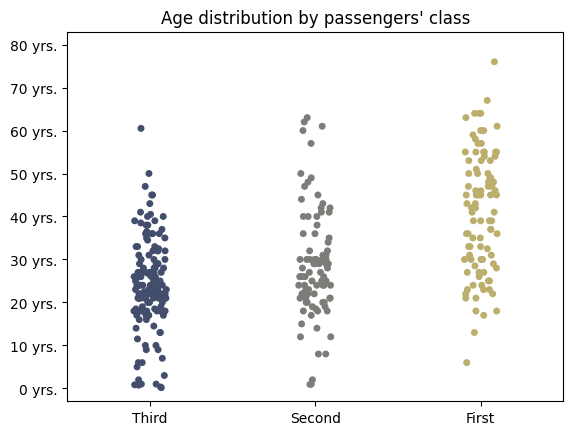

In [117]:
sns.stripplot(data, x='Pclass', y='Age', hue='Pclass', palette='cividis', legend=False)
plt.yticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.ylim(-3, 83)
plt.title("Age distribution by passengers' class")
plt.xlabel('')
plt.ylabel('')
plt.show()

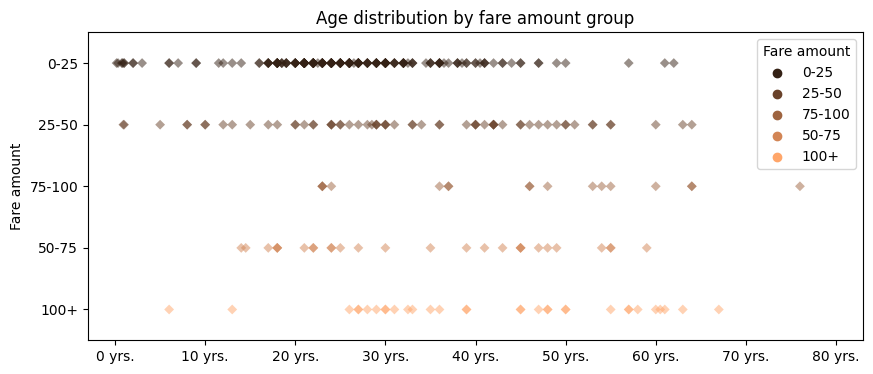

In [118]:
def grouping(fare):
    if fare < 25:
        return '0-25'
    elif fare >= 25 and fare < 50:
        return '25-50'
    elif fare >= 50 and fare < 75:
        return '50-75'
    elif fare >= 75 and fare < 100:
        return '75-100'
    else:
        return '100+'

subset = data[['Fare', 'Age']]
subset['Fare amount'] = subset['Fare'].transform(grouping)

plt.figure(figsize=(10, 4))
sns.stripplot(
    subset, y='Fare amount', x='Age', hue='Fare amount',
    jitter=False, palette='copper', marker='D', alpha=0.5
)
plt.xticks(np.arange(0, 81, 10), [f"{yrs} yrs." for yrs in np.arange(0, 81, 10)])
plt.xlim(-3, 83)
plt.title("Age distribution by fare amount group")
plt.xlabel('')
plt.show()